# Predicting Credit Card Approvals

##### Import relevant libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load cc_approvals.data
cc_apps = pd.read_csv("cc_approvals.data", header=None)
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Exploratory Data Analysis

In [3]:
# Rename columns
cols = []
for i in range(1, len(cc_apps.columns)+1):
    cols.append("A" + str(i))
cc_apps.columns = cols

In [4]:
cc_apps

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [5]:
# Inspect data
cc_apps.sample(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
52,b,37.42,2.040,u,g,w,v,0.040,t,f,0,t,g,00400,5800,+
162,b,25.08,1.710,u,g,x,v,1.665,t,t,1,t,g,00395,20,+
185,b,48.75,8.500,u,g,c,h,12.500,t,t,9,f,g,00181,1655,+
536,a,24.92,1.250,u,g,ff,ff,0.000,t,f,0,f,g,00080,0,-
299,b,22.17,12.125,u,g,c,v,3.335,f,t,2,t,g,00180,173,-
501,b,39.00,5.000,u,g,cc,v,3.500,t,t,10,t,g,00000,0,+
541,b,42.75,3.000,u,g,i,bb,1.000,t,f,0,f,g,00000,200,-
578,b,39.17,1.625,u,g,c,v,1.500,t,t,10,f,g,00186,4700,+
599,b,20.50,2.415,u,g,c,v,2.000,t,t,11,t,g,00200,3000,+
218,b,53.92,9.625,u,g,e,v,8.665,t,t,5,f,g,00000,0,+


In [6]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
# Convert A2, A14 columns to numeric
cc_apps = cc_apps.replace('?', np.nan)
cc_apps[['A2','A14']] = cc_apps[['A2','A14']].apply(pd.to_numeric)

In [8]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [9]:
# Check the data types of A2 and A14
cc_apps[['A2','A14']].dtypes

A2     float64
A14    float64
dtype: object

In [10]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [11]:
# Impute numerical values with mean
cc_apps.fillna(cc_apps.mean(), inplace=True)

In [12]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [14]:
# Check for missing values
cc_apps.isnull().sum()

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

In [15]:
# Fill missing values with mode
for col in cc_apps.columns:
    if cc_apps[col].dtypes == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [16]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [23]:
# Label Encode A16
le = LabelEncoder()
cc_apps['A16'] = le.fit_transform(cc_apps['A16'])

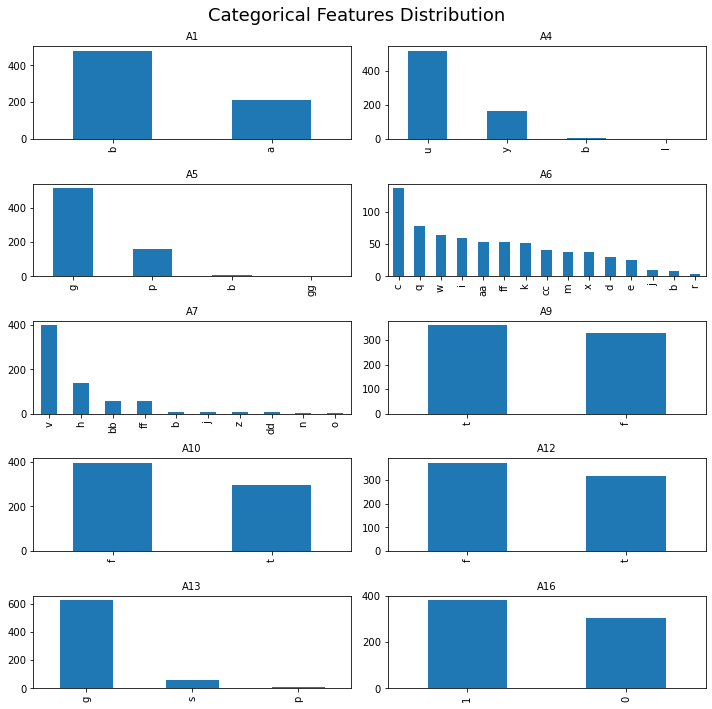

In [29]:
# Plot the distributions of categorical variables in the dataset in a subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
fig.suptitle('Categorical Features Distribution', fontsize=18)
for idx, cat_col in enumerate(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']):
    row, col = idx//2, idx%2
    cc_apps[cat_col].value_counts().plot(kind='bar', ax=axes[row][col])
    axes[row][col].set_title(cat_col, fontsize=10)
plt.tight_layout()

In [37]:
# Get the percentage of A16 values 
cc_apps['A16'].value_counts(normalize=True)
 

1    0.555072
0    0.444928
Name: A16, dtype: float64

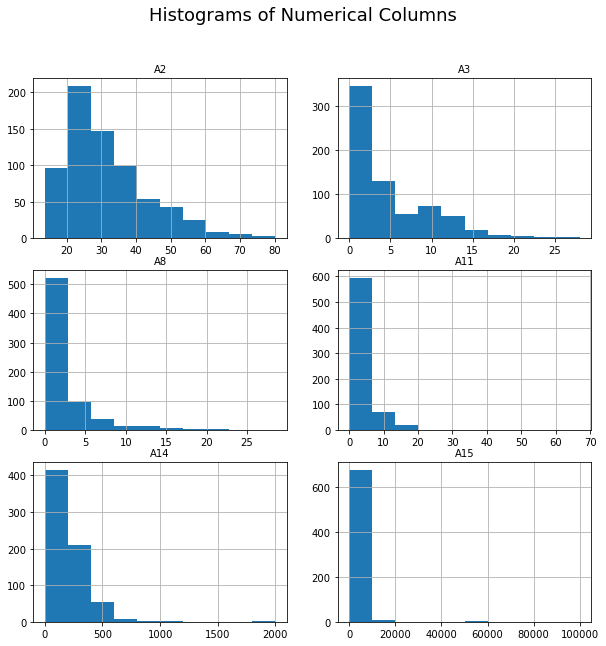

In [30]:
# Plot the distributions of numerical variables in the dataset in a subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
# Add title to the figure
fig.suptitle('Histograms of Numerical Columns', fontsize=18)
for idx, cat_col in enumerate(['A2', 'A3', 'A8', 'A11', 'A14', 'A15']):
    row, col = idx//2, idx%2
    cc_apps[cat_col].hist(ax=axes[row][col])
    axes[row][col].set_title(cat_col, fontsize=10)

### Feature Engineering

In [31]:
# label encode A1, A5, A9, A10, A12, A13
for col in ['A1', 'A5', 'A9', 'A10', 'A12', 'A13']:
    cc_apps[col] = le.fit_transform(cc_apps[col])
    
cc_apps

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,u,1,w,v,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,u,1,q,h,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,u,1,q,h,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,u,1,w,v,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,u,1,w,v,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,y,3,e,h,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,u,1,c,v,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,y,3,ff,ff,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,u,1,aa,v,0.04,0,0,0,0,0,280.0,750,1


In [32]:
# One hot encode A4, A6, A7
cc_apps = pd.get_dummies(cc_apps, columns=['A4', 'A6', 'A7'])
cc_apps

,A1,A2,A3,A5,A8,A9,A10,A11,A12,A13,...,A7_b,A7_bb,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z
0,1,30.83,0.000,1,1.25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,58.67,4.460,1,3.04,1,1,6,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,1,1.50,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,1,3.75,1,1,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,20.17,5.625,1,1.71,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,3,1.25,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
686,0,22.67,0.750,1,2.00,0,1,2,1,0,...,0,0,0,0,0,0,0,0,1,0
687,0,25.25,13.500,3,2.00,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
688,1,17.92,0.205,1,0.04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# Split data into train and test sets
X = cc_apps.drop('A16', axis=1)
y = cc_apps['A16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale the feature values to a uniform range
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)



## Modelling Building without Cross Validation

In [69]:
# Create models with Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Naive Bayes classifiers and compare their accuracy

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'f1'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(rescaledX_train, y_train)
    y_pred = model.predict(rescaledX_test)
    f1 = f1_score(y_test, y_pred)
    
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'f1':f1}, ignore_index=True)


In [70]:
result_table.set_index('classifiers', inplace=True)

<Figure size 432x288 with 0 Axes>

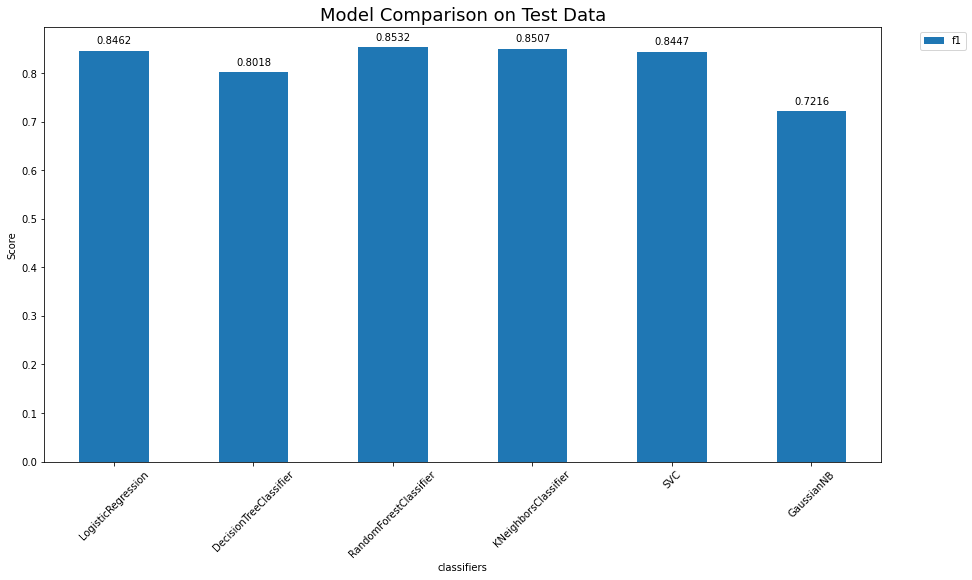

In [73]:
# plot the results with annotations
plt.subplots_adjust(bottom=0.2, top=0.98)
result_table.plot(kind='bar', figsize=(15,8))
plt.title('Model Comparison on Test Data', fontsize=18)
plt.xticks(rotation=45)
# Move the legend out of the plot
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# Rotate the annotations of the scores
for p in plt.gca().patches:
    plt.gca().annotate('{:.4f}'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), 
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    
# Set the y-axis label
plt.ylabel('Score')
plt.show()


## Modelling with Cross Validation

In [79]:
# Scale the feature values to a uniform range
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)



In [80]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, rescaledX, y, scoring = "f1", cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
     
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","DecisionTree","RandomForest","KNeighboors","SVC","NaiveBayes"]})

In [81]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.805769,0.275094,LogisticRegression
1,0.790705,0.185019,DecisionTree
2,0.851555,0.162950,RandomForest
3,0.842819,0.093194,KNeighboors
4,0.805423,0.281252,SVC
5,0.795119,0.040931,NaiveBayes


In [83]:
# Use GridSearchCV to find the best parameters for the Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Naive Bayes classifiers and compare their F1 scores on the test set

# Logistic Regression
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, scoring='f1', cv=10)
lr_grid.fit(rescaledX_train, y_train)
lr_best_params = lr_grid.best_params_

# Decision Tree
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='f1', cv=10)
dt_grid.fit(rescaledX_train, y_train)
dt_best_params = dt_grid.best_params_

# Random Forest
rf_params = {'n_estimators': [10, 50, 100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='f1', cv=10)
rf_grid.fit(rescaledX_train, y_train)
rf_best_params = rf_grid.best_params_

# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='f1', cv=10)
knn_grid.fit(rescaledX_train, y_train)
knn_best_params = knn_grid.best_params_

# SVM
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), svm_params, scoring='f1', cv=10)
svm_grid.fit(rescaledX_train, y_train)
svm_best_params = svm_grid.best_params_

# Naive Bayes
nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
nb_grid = GridSearchCV(GaussianNB(), nb_params, scoring='f1', cv=10) 
nb_grid.fit(rescaledX_train, y_train)
nb_best_params = nb_grid.best_params_

In [89]:
# print the best parameters for each classifier
print('Logistic Regression best parameters: ', lr_best_params)
print('Decision Tree best parameters: ', dt_best_params)
print('Random Forest best parameters: ', rf_best_params)
print('KNN best parameters: ', knn_best_params)
print('SVM best parameters: ', svm_best_params)
print('Naive Bayes best parameters: ', nb_best_params)

Logistic Regression best parameters:  {'C': 0.1, 'penalty': 'l2'}
Decision Tree best parameters:  {'criterion': 'entropy', 'max_depth': 2}
Random Forest best parameters:  {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
KNN best parameters:  {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
SVM best parameters:  {'C': 0.1, 'kernel': 'rbf'}
Naive Bayes best parameters:  {'var_smoothing': 1}


In [84]:
# Compare the F1 scores of the models with the best parameters
best_classifiers = [LogisticRegression(**lr_best_params), DecisionTreeClassifier(**dt_best_params), RandomForestClassifier(**rf_best_params), KNeighborsClassifier(**knn_best_params), SVC(**svm_best_params), GaussianNB(**nb_best_params)]
best_classifiers_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes']
best_classifiers_f1 = []
 
for classifier in best_classifiers:
    classifier.fit(rescaledX_train, y_train)
    y_pred = classifier.predict(rescaledX_test)
    best_classifiers_f1.append(f1_score(y_test, y_pred))
     
best_classifiers_results = pd.DataFrame({'F1 Score': best_classifiers_f1}, index=best_classifiers_names)
best_classifiers_results

,F1 Score
Logistic Regression,0.855769
Decision Tree,0.837438
Random Forest,0.880000
KNN,0.862222
SVM,0.850242
Naive Bayes,0.845070


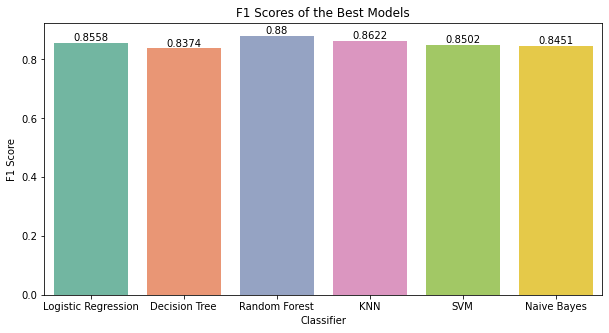

In [88]:
# Plot the F1 scores of the models with the best parameters
plt.figure(figsize=(10, 5))
plt.title('F1 Scores of the Best Models')
sns.barplot(x=best_classifiers_results.index, y='F1 Score', data=best_classifiers_results, palette='Set2')
plt.xlabel('Classifier')
# annotate the bars with the F1 scores
for i, v in enumerate(best_classifiers_results['F1 Score']):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')
plt.show()